<a href="https://colab.research.google.com/github/NicolasSocquetJuglard/TP2_ML/blob/main/TP2_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score, precision_score, recall_score, roc_auc_score

from google.colab import files

In [93]:
#Load dataset

uploaded_heart = files.upload()

Saving heart.csv to heart (1).csv


  **PART 1**

In [94]:
#Displaying head of dataset

df = pd.read_csv('heart.csv', delimiter = ',')

df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [95]:
# Check for null value
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

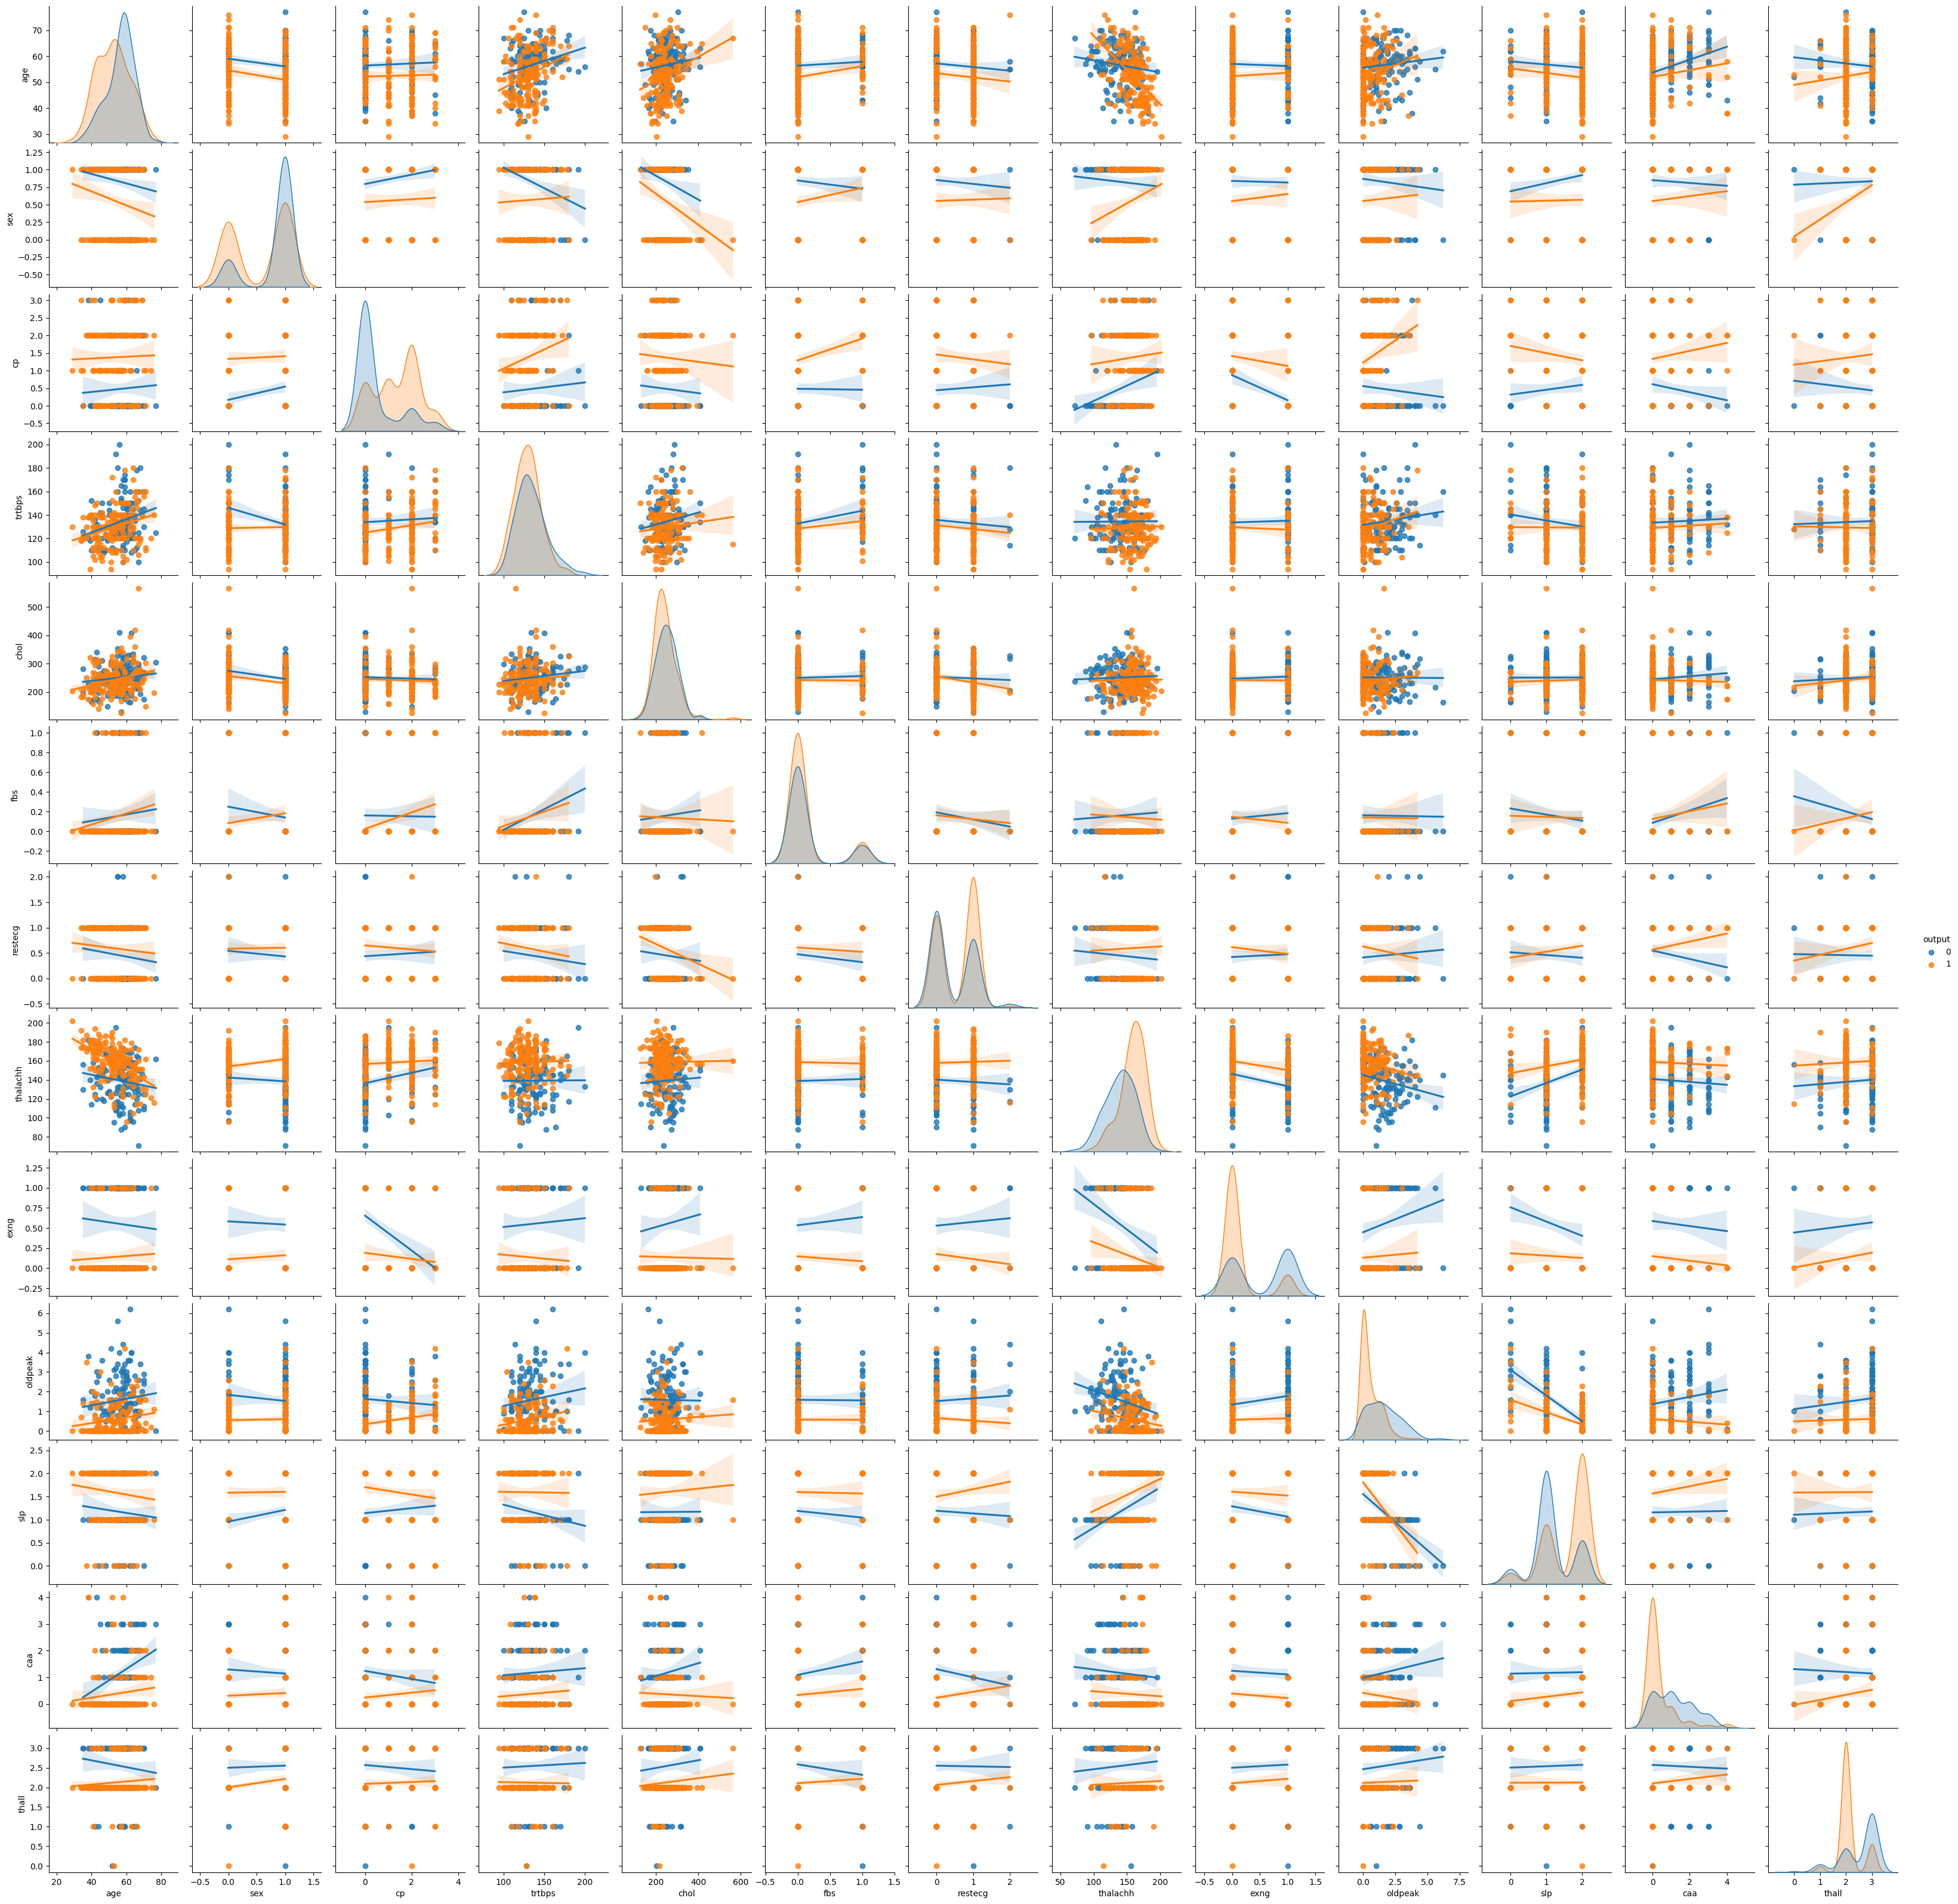

In [96]:
# Visualize the distribution of each feature on graph 

sb.pairplot(df, hue='output', kind="reg")

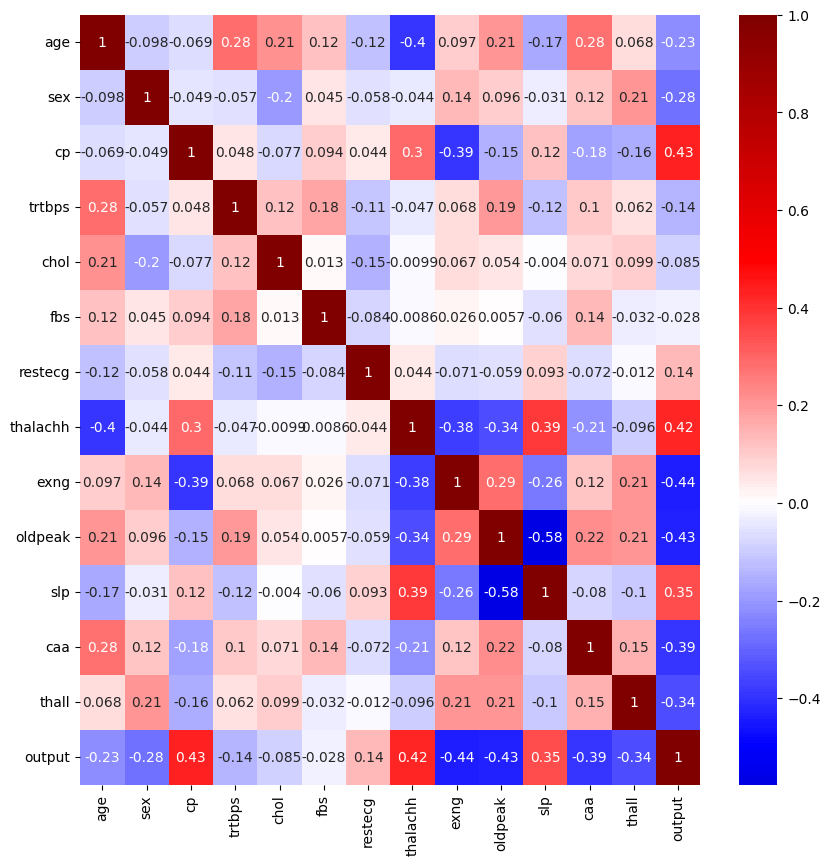

In [97]:
fig, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(df.corr(), annot=True, cmap="seismic", center=0, fmt='.2g');

In [98]:
# Show the features in order of their correlation with the target (stress_level)
abs(df[df.columns[:]].corr()['output'][:]).sort_values(ascending=False).to_frame()

,output
output,1.000000
exng,0.436757
cp,0.433798
oldpeak,0.430696
thalachh,0.421741
caa,0.391724
slp,0.345877
thall,0.344029
sex,0.280937
age,0.225439


In [99]:
#Splitting dataset

X = df.drop(columns = ["fbs", "chol", "restecg", "trtbps"])
y = df["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, stratify = None)

In [100]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(242, 10) (242,)
(61, 10) (61,)


In [101]:
#Creating SVM model with default settings
from sklearn import svm

svm_classifier_default = svm.SVC()

#Preprocessing (normalize the data)
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train, X_test = std_scale.transform(X_train), std_scale.transform(X_test)

svm_classifier_default.fit(X_train, y_train)

SVC()

In [102]:
#Predicting output

y_pred = svm_classifier_default.predict(X_test)

[[30  0]
 [ 0 31]]
Accuracy : 1.0
Precision : 1.0
F1 score : 1.0
MEAN SCORE : 1.0


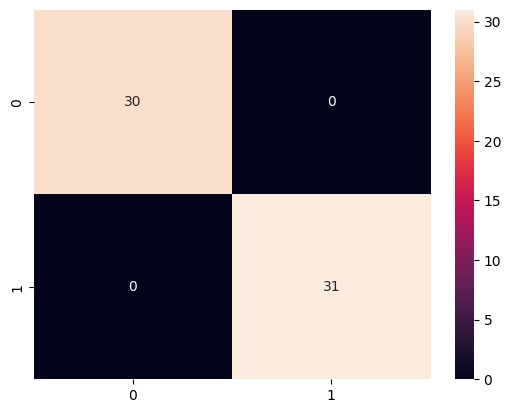

In [103]:
#Evalutation our model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot = True)
print(conf_matrix)

accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)

mean_score = round(np.mean([accuracy, precision, f1]), 5)

print(f"Accuracy : {accuracy}\nPrecision : {precision}\nF1 score : {f1}\nMEAN SCORE : {mean_score}")

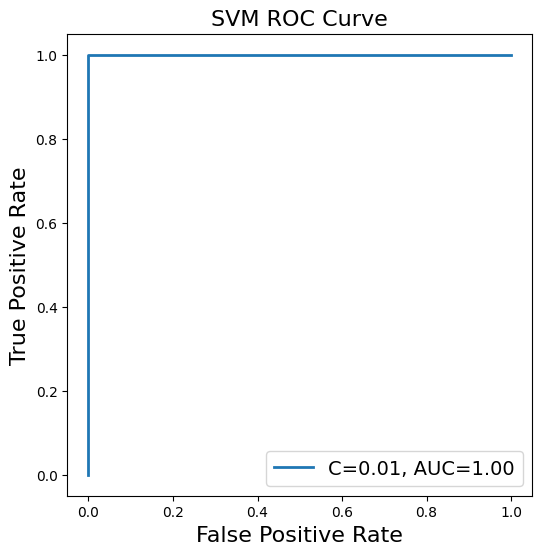

In [104]:
#build the ROC curve
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred)

#area under the curve
auc = metrics.auc(fpr, tpr)

# figure
fig = plt.figure(figsize=(6, 6))

# curve ROC
plt.plot(fpr, tpr, '-', lw=2, label='C=0.01, AUC=%.2f' % auc)

# title & axes
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

plt.legend(loc="lower right", fontsize=14)

plt.show()

**PART 2**

In [105]:
#Creating another model with manual settings
svm_classifier_manual = svm.SVC(kernel = "poly", C = 7)
svm_classifier_manual.fit(X_train, y_train)

#Predicting
y_pred = svm_classifier_manual.predict(X_test)

#Evaluating model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred, average = 'micro'), 5)
f1 = round(f1_score(y_test, y_pred, average = 'micro'), 5)

mean_score = round(np.mean([accuracy, precision, f1]), 5)

print(f"Accuracy : {accuracy}\nPrecision : {precision}\nF1 score : {f1}\nMEAN SCORE : {mean_score}")

[[30  0]
 [ 0 31]]
Accuracy : 1.0
Precision : 1.0
F1 score : 1.0
MEAN SCORE : 1.0


**PART 3**

In [106]:
#Creating KNN model with most appropriate number of neighbors using GridSearchCV method
knn_model = KNeighborsClassifier()

#Creating a dictionnary with evenly spaced values of neighbors
n_grid = {'n_neighbors' : np.arange(1, 10)} 

#Creates a knn model with the optimal nb of neighbors given
knn = GridSearchCV(knn_model, n_grid, cv = 5) 

#Training the model
knn.fit(X_train, y_train) 

print(f"The optimal number of neighbors is {knn.best_params_['n_neighbors']}.")

The optimal number of neighbors is 9.


In [107]:
#Predicting from our KNN model
y_pred = knn.predict(X_test)

In [108]:
#Getting metrics from the prediction

sc_tab_knn = []
acc_sc_knn = round(accuracy_score(y_test, y_pred), 5)
sc_tab_knn.append(acc_sc_knn)
prec_sc_knn = round(precision_score(y_test, y_pred, average = 'micro'), 5)
sc_tab_knn.append(prec_sc_knn)
f1_sc_knn = round(f1_score(y_test, y_pred, average = 'micro'), 5)
sc_tab_knn.append(f1_sc_knn)
recall_sc_knn = round(recall_score(y_test, y_pred, average = 'micro'), 5)
sc_tab_knn.append(recall_sc_knn)

mean_sc_knn = round(np.mean(sc_tab_knn), 5)

print(f"Accuracy : {acc_sc_knn}\nPrecision : {prec_sc_knn}\nF1 score : {f1_sc_knn}\nRecall : {recall_sc_knn}\n")
print(f"MEAN SCORE KNN: {mean_sc_knn}")

Accuracy : 0.98361
Precision : 0.98361
F1 score : 0.98361
Recall : 0.98361

MEAN SCORE KNN: 0.98361


In [109]:
#Creating SVM model using GridSearchCV
from sklearn.model_selection  import GridSearchCV

svm_model = svm.SVC()
param_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'C' : np.arange(1, 10)}
svm_classifier_grid = GridSearchCV(svm_model, param_grid, cv = 5)

# Print the best hyperparameters
svm_classifier_grid.fit(X_train, y_train)
print("Best parameters:", svm_classifier_grid.best_params_)

# Print the accuracy of the best model
best_model = svm_classifier_grid.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Best parameters: {'C': 1, 'kernel': 'linear'}
Accuracy: 100.00%


In [110]:
y_pred = svm_classifier_grid.predict(X_test)

#Evaluating model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred, average = 'micro'), 5)
f1 = round(f1_score(y_test, y_pred, average = 'micro'), 5)

mean_score = round(np.mean([accuracy, precision, f1]), 5)

print(f"Accuracy : {accuracy}\nPrecision : {precision}\nF1 score : {f1}\nMEAN SCORE : {mean_score}")

[[30  0]
 [ 0 31]]
Accuracy : 1.0
Precision : 1.0
F1 score : 1.0
MEAN SCORE : 1.0


**PART 4**

In [111]:
#Creating SVM model using RandomizedSearchCV
from numpy.random.mtrand import randint
from sklearn.model_selection  import RandomizedSearchCV

svm_model = svm.SVC()

param_random = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'C' : randint(1, 10)}
svm_classifier_random = RandomizedSearchCV(svm_model, param_grid, cv = 5)

svm_classifier_random.fit(X_train, y_train)
print(svm_classifier_random.best_params_)

{'kernel': 'linear', 'C': 9}


In [112]:
y_pred = svm_classifier_random.predict(X_test)

#Evaluating model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)

mean_score = round(np.mean([accuracy, precision, f1]), 5)

print(f"Accuracy : {accuracy}\nPrecision : {precision}\nF1 score : {f1}\nMEAN SCORE : {mean_score}")

[[30  0]
 [ 0 31]]
Accuracy : 1.0
Precision : 1.0
F1 score : 1.0
MEAN SCORE : 1.0


**PART 5**

In [113]:
#Return parameters for KNN and SVM models
def get_parameters():
  knn_parameters = {'n_neighbors' : [3, 5, 7],'weights': ['uniform', 'distance']}
  svm_parameters = {'C': [0.1, 1, 100, 1000], 'kernel' : ['linear', 'rbf', 'poly']}
  return knn_parameters, svm_parameters

In [114]:
#Function returning standardized training and testing datasets and taking as inputs dataframe, columns to drop for X and class y
def data_preprocessing(df, drop_columns, output):
  X = df.drop(columns = drop_columns)
  y = df['output']

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, stratify = None)

  std_scale = preprocessing.StandardScaler().fit(X_train)
  X_train, X_test = std_scale.transform(X_train), std_scale.transform(X_test)

  return X_train, X_test, y_train, y_test

In [115]:
#Function returning best KNN and SVM fit classifiers and taking as input training and testing data sets
def get_classifiers(X_train, X_test, y_train, y_test):
  knn_model = KNeighborsClassifier()  
  svm_model = svm.SVC()

  knn_parameters, svm_parameters = get_parameters()

  knn_grid = GridSearchCV(knn_model, knn_parameters, cv = 5).fit(X_train, y_train)
  svm_grid = GridSearchCV(svm_model, svm_parameters, cv = 5).fit(X_train, y_train)

  knn_classifier = knn_grid.best_estimator_
  svm_classifier = svm_grid.best_estimator_
  
  return knn_classifier, svm_classifier

In [116]:
#Function returning mean score of a model and taking as input desired model
def get_mean_score(model, X_test, y_test):
  y_pred = model.predict(X_test)
  mean_score = np.mean([accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)])
  return round(mean_score, 5)

In [117]:
def get_best_model(df, drop_columns, output):
  X_train, X_test, y_train, y_test = data_preprocessing(df, drop_columns, output)
  knn_classifier, svm_classifier = get_classifiers(X_train, X_test, y_train, y_test)
  mean_knn, mean_svm = get_mean_score(knn_classifier, X_test, y_test), get_mean_score(svm_classifier, X_test, y_test)
  
  best_model = None
  mesn_best = 0
  if mean_knn >= mean_svm:
    best_model = knn_classifier
    mean_best = mean_knn
  else:
    best_model = svm_classifier
    mean_best = mean_svm
  
  return best_model, mean_best

In [118]:
best_model, mean_best = get_best_model(df, ["fbs", "chol", "restecg", "trtbps"], ["output"])
print(f"Best model : {best_model.__class__.__name__}, \nMEAN SCORE : {mean_best}")

Best model : KNeighborsClassifier, 
MEAN SCORE : 1.0
